In [89]:
import re
import numpy as np

def roll_dice(roll_string: str, return_steps: bool = False):
    # replaces rolls with random numbers
    parsed_roll_string = roll_string
    roll_string = " ".join(roll_string.split()).strip()
    raw_rolls = re.findall(pattern="[0-9]* *d *[0-9]+", string=roll_string, flags=re.IGNORECASE)
    for roll in raw_rolls:
        multiplier, dice = [n.strip() for n in roll.split("d")]
        multiplier, dice = int(multiplier) if multiplier else 1, int(dice)
        rolls = np.random.randint(low=1, high=dice + 1, size=multiplier)
        parsed_roll = f"({'+'.join([str(n) for n in rolls])})"
        parsed_roll_string = re.sub(pattern=roll, repl=parsed_roll, string=parsed_roll_string, count=1)
    # rolls the dices
    steps = [roll_string, parsed_roll_string, str(eval(parsed_roll_string, {}))]
    if return_steps:
        return steps
    return int(steps[-1])

    damage  probability
0        5       0.1628
1        6       0.1397
2        4       0.1343
3        7       0.1153
4        3       0.1145
5        2       0.0832
6        8       0.0827
7        1       0.0564
8        9       0.0553
9       10       0.0291
10       0       0.0267
    damage  probability
0        3       0.1691
1        2       0.1381
2        4       0.1344
3        5       0.1128
4        1       0.1103
5        6       0.0843
6        0       0.0827
7       -1       0.0565
8        7       0.0555
9        8       0.0288
10      -2       0.0275


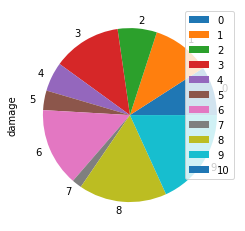

ValueError: None doesn't allow negative values

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

stats = pd.DataFrame(columns=["reduction", "final_damage"])

for reduction in {2, 4, 6}:
    stats = stats.append(pd.DataFrame({
        "reduction": [reduction
                      for _ in range(10**4)],
        "final_damage": [roll_dice("2d6") - reduction
                         for _ in range(10**4)]
    }), ignore_index=True)

for reduction in set(stats["reduction"]):
    damages = stats.where(stats["reduction"] == reduction).dropna().drop(columns=["reduction"])
    damages = damages["final_damage"].value_counts().reset_index().rename(columns={"index": "damage", "final_damage": "probability"})
    damages["probability"] = damages["probability"] / damages["probability"].sum()
    # damages["damage"] = damages["damage"].astype(str)
    print(damages)
    # sns.barplot(data=damages.reset_index(), x="index", y="final_damage")
    damages.plot.pie(y="damage")
    plt.show()
